# Importing the libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading the dataset.

In [14]:
d=pd.read_csv("/content/IRIS.csv")

# Data Exploration

In [15]:
print(d.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [16]:
d.shape

(150, 5)

In [17]:
d.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
d.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [19]:
d.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Analysis Through Visualisation

<Axes: xlabel='species', ylabel='sepal_length'>

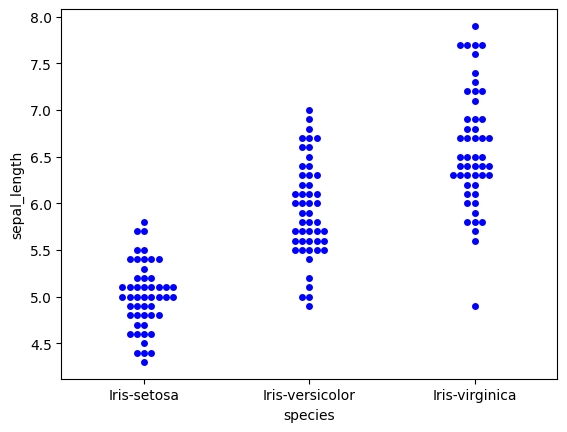

In [20]:
sns.swarmplot(x=d['species'],y=d['sepal_length'],color='b')

<Axes: xlabel='species', ylabel='sepal_width'>

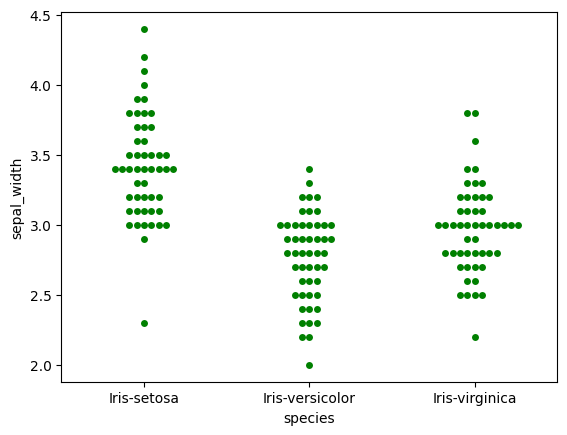

In [21]:
sns.swarmplot(x=d['species'],y=d['sepal_width'],color='g')

<Axes: xlabel='species', ylabel='petal_length'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


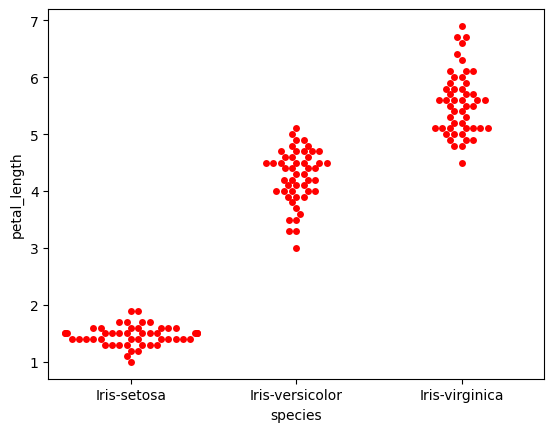

In [22]:
sns.swarmplot(x=d['species'],y=d['petal_length'],color='r')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='species', ylabel='petal_width'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


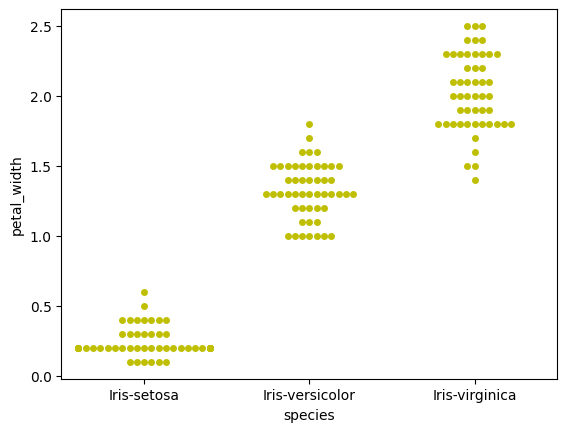

In [23]:
sns.swarmplot(x=d['species'],y=d['petal_width'],color='y')

In [24]:
X= d[['sepal_length','sepal_width','petal_length','petal_width']]
y= d['species']

# Splitting Training & Testing Datasets.

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

# KNN Classification

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
pred1=knn.predict(X_test)
a1=accuracy_score(y_test,pred1)
print("Accuracy KNN : ",a1*100, '%')

Accuracy KNN :  96.66666666666667 %


**Decision Tree Classification**

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
pred2=dtc.predict(X_test)
a2=accuracy_score(y_test,pred2)
print("Accuracy Decision Tree : ",a2*100, '%')

Accuracy Decision Tree :  100.0 %


# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()
l.fit(X,y)
l.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
pred = l.predict(X)
Scores = pd.DataFrame({'Actual':y,'Predictions':pred})
Scores.head()

,Actual,Predictions
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa


In [33]:
y_pred=l.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100,'%')

100.0 %
